<ul><font size = 5 color='Orange'>
Learning Goals</font>
<font color = 'Orange'><li>Understand the structure of a web page.</li>
<li>Understand how to use Beautiful soup to scrape content from web pages.</li>
<li>Feel comfortable storing and manipulating the content in various formats.</li>
<li>Understand how to convert structured format into a Pandas DataFrame.</li>
</font>
</ul>

<font size = 4 color = "green">For this homework your job is to find a web-site from which you will extract the data, we are suggestioning for a local-site like time.mk, sitel.mk, vecer.mk, panacea.mk, reklama5.mk, etc. Accordinly with the choice you've made make a quick summary why did you use especially this web-site and what is the part of interest.</font>

#<font color = 'Orange'>Explain the Web-site that you will be using in this homework.</font>

In the following text-box answer the questions:
<li>What data you will be extracting and why?</li>
<li>Add a screenshot of the web-site that you will be scraping</li>



 add your answers here:

 Јас се одлучив да земам податоци од веб страната reklama5.mk
 односно поточно https://reklama5.mk/Search?city=&cat=580&q=  (огласи од категорија компјутери ) <br>
 Се одлучив за оваа веб страна затоа што е често користена страна која има голем број на огласи и податоци во врска со огласите. Јас ќе превземам податоци за наслов, цена, локација и датум на огласи од категорија компјутери.

add your screenshot here:
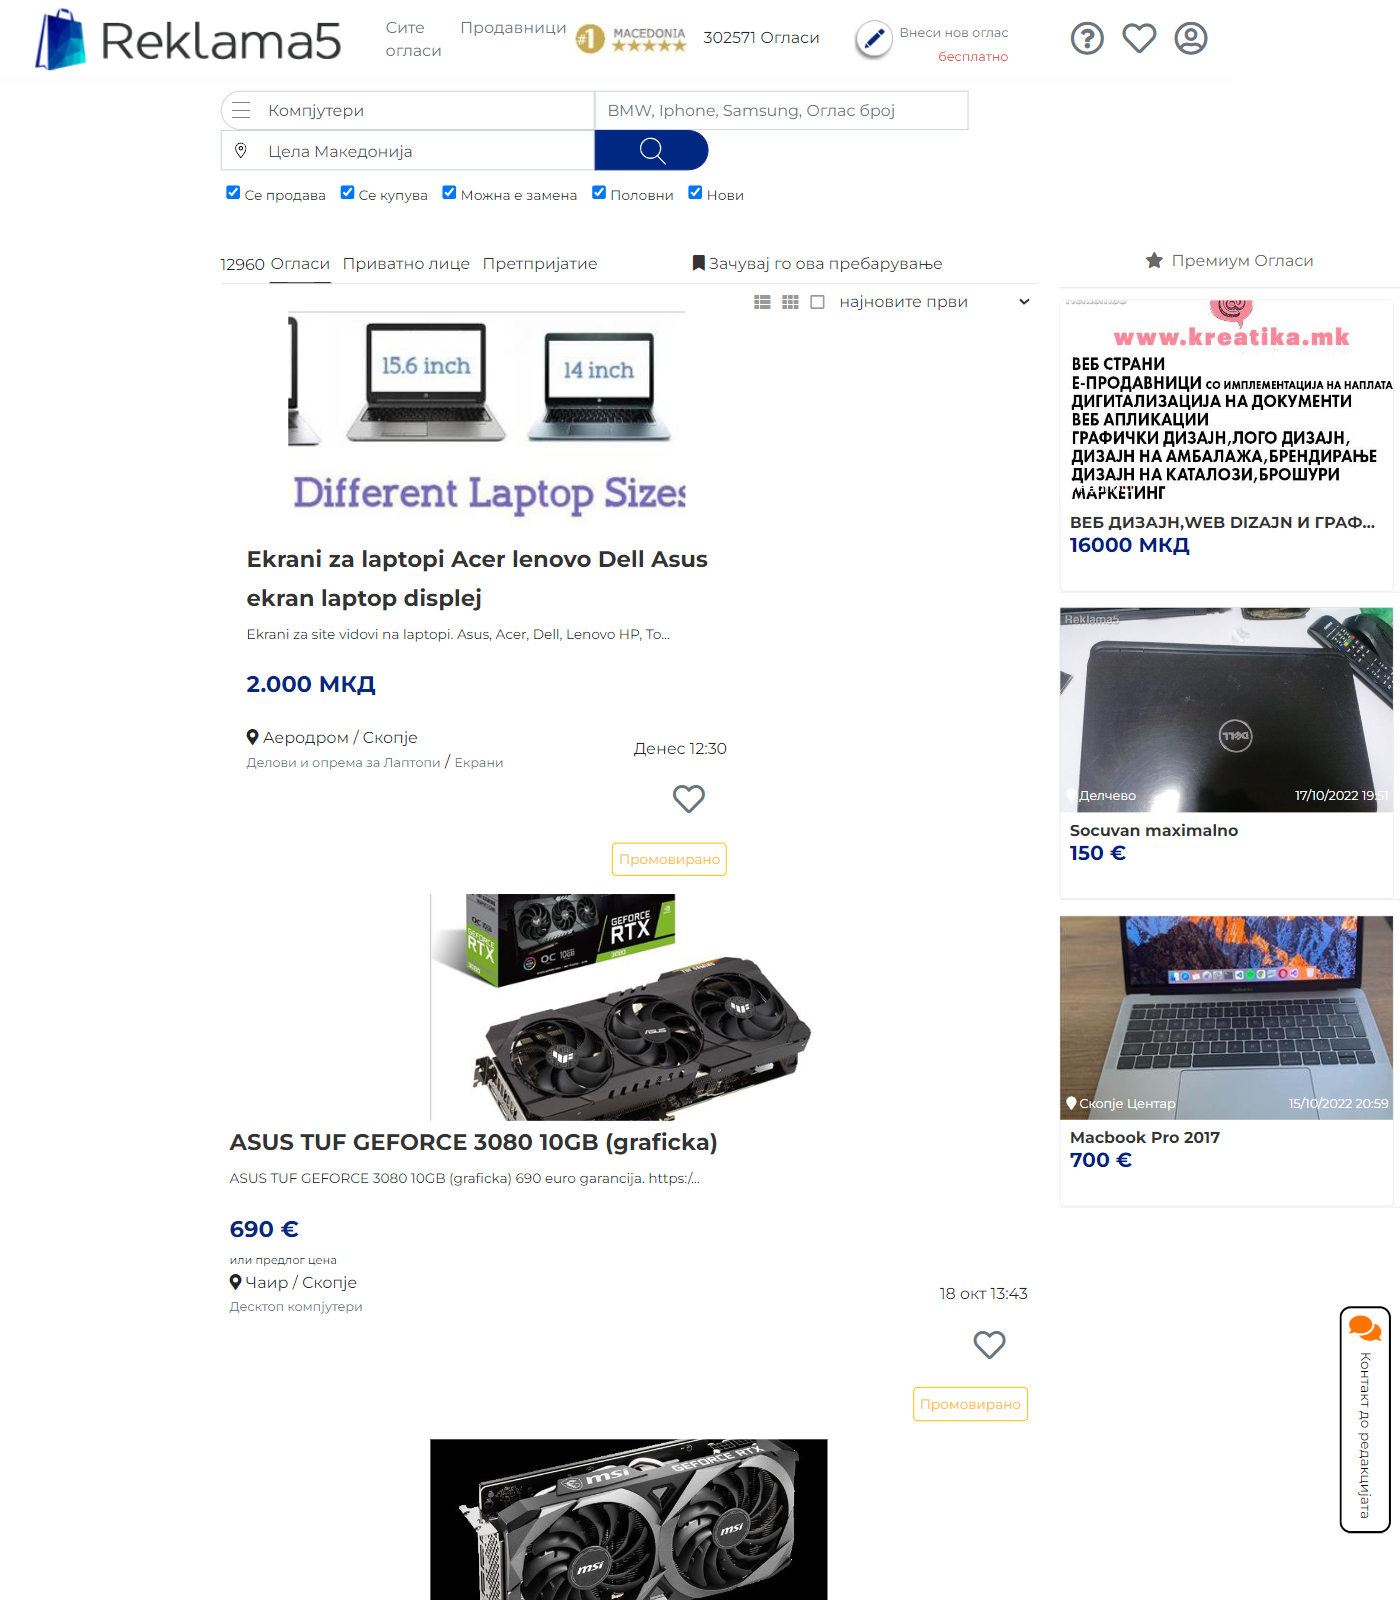


# <font color='Orange'>Requirements specified for Web Scraping</font>


Import all libraries and modules that you are going to use.

In [20]:
#start here
#shift+enter in this box will run the code that's here and open a new code-box below
#import ....
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup as soup
from IPython.display import HTML
import requests
import warnings
from datetime import date
from datetime import timedelta

requests.packages.urllib3.disable_warnings()
warnings.filterwarnings("ignore")

# <font color = 'Orange'> Start the scraping by sending HTTP request</font> 

 **Fetch a website's content - send request**

In [21]:
#add your code
url = 'https://reklama5.mk/Search?city=&cat=580&q='
response = requests.get(url)

**Get the response-status code and see:**
<li>If the code starts with a 2, it means the request was successful.



In [22]:
#add your code
response
# <Response [200]>

<Response [200]>

# <font color = 'orange'>Parse the HTML with BeautifulSoup</font>

Beautiful Soup is a Python library for pulling data out of HTML and XML files. It works with your favorite parser to provide idiomatic ways of navigating, searching, and modifying the parse tree. It commonly saves programmers hours or days of work. 


**Parse using BeautifulSoap**




In [23]:
#add your code
html = soup(response.text,"html.parser")

**Print the HTML code that you get**

In [24]:
#add your code
print(html)

<!DOCTYPE html>

<html>
<head>
<meta charset="utf-8"/>
<title>Oglasi | Reklama5.mk | Огласи | Автомобили | Недвижнини | Компјутери | Мобилн телефони | Услуги,Бизнис | Вработување | Реклами |</title>
<link href="/favicon.ico" rel="SHORTCUT ICON" type="image/vnd.microsoft.icon"/>
<link href="/favicon.ico" rel="icon" type="image/png"/>
<script>
            var xmlhttp = new XMLHttpRequest();
            xmlhttp.open("GET", "/SiteNavigation", true);
            xmlhttp.onreadystatechange = function () {
                if (xmlhttp.readyState == XMLHttpRequest.DONE) {
                    if (xmlhttp.status == 200) {
                        if (document.getElementById("dvSiteNav"))
                            document.getElementById("dvSiteNav").innerHTML = xmlhttp.responseText;
                        else
                            window.siteNavHtml = xmlhttp.responseText;
                    }
                }
            };
            xmlhttp.send();
        </script>
<link href="/Co

# <font color='Orange'>Extracting data</font>

From the printed HTML code search for the data you need for building the dataset, find the classes for groupby option.

**In the following text-box write the attributes you are going to use**

<font color='red'> You need to extract a minimum of four features (lists/columns) from the web site (example: titles, posting time, comments, likes, ...)</font>

`add your attributes here for building the dataset`
<br> title, price, location, date

**Try to select the first element from your attributes. Find out from the html code what part do you need.**

In [25]:
#add your code
titles_soup = html.select('.SearchAdTitle')
titles_soup[0].text

' INSTALACIA NA WIN 10 SO SITE PROGRAMI ZA ON LINE NASTAVA '

**Add as many codeboxes as you need for selecting all the html elements**

In [26]:
#add your code
prices_soup = html.select('.search-ad-price')
len(prices_soup)

43

In [27]:
locations_soup = html.select('.city-span')
print(len(locations_soup))
locations_soup[10].text.strip()

43


'Аеродром / Скопје'

In [28]:
dates_soup = html.select('.ad-date-div-1.col-lg-2.text-right')
print(len(dates_soup))
dates_soup[12].text

43


'\r\n                            Денес\r\n\r\n                            10:39\r\n                            \n\n\n\n\n\n\n'

**Create lists with the extracted data from the html elements that you selected**

In [29]:
#add your code
titles = []
for title in titles_soup:
  titles.append(title.text.strip())
# titles

In [30]:
prices = []
for price in prices_soup:
  prices.append(" ".join(price.text.split()))
# prices

In [31]:
locations = []
for location in locations_soup:
  locations.append(location.text.strip())
# locations

In [44]:
dates = []
for date_soup in dates_soup:
  inner_span = date_soup.select_one("> span")
  if inner_span:
    date_text = inner_span.text
  else:
    date_text = date_soup.text
  date_text = " ".join(date_text.split())
  if date_text.startswith("Денес"):
    day=date.today().strftime("%d %b ")
    date_text = date_text.replace("Денес",day)
  if date_text.startswith("Вчера"):
    today=date.today()
    yesterday = today - timedelta(days = 1)
    day=yesterday.strftime("%d %b ")
    date_text = date_text.replace("Вчера",day)
  dates.append(date_text)
# dates

**Print all lists that are containing the elements**

In [ ]:
#add your code
titles

In [ ]:
prices

In [ ]:
locations

In [ ]:
dates

**Check if all lists are the same size**

In [ ]:
#add your code
print(len(titles) == len(prices) == len(locations) == len(dates))

# <font color='Orange'>Create a Pandas DataFrame</font> 


**Create the DataFrame from the lists you get and name your *Columns***

In [38]:
#add your code
data = []

for i in range(0, len(titles)):
  item = {}
  item['Date'] = dates[i]
  item['Title'] = titles[i]
  item['Location'] = locations[i]
  item['Prices'] = prices[i]
  data.append(item)

data_frame = pd.DataFrame(data)

**Print the dataset you obtain**

In [ ]:
#add your code
data_frame

# <font color = 'Green'>Advanced part</font>

<font color = 'orange'>This part is not mandatory and is intended for those who want to expand their knowledge in this field</font>

There are other libraries in Python that can be used to scrape a website. Some examples are Scrapy (https://scrapy.org/) and Selenium (https://selenium-python.readthedocs.io/).




## <font color = 'Green'>Extra task 1: Selenium</font> 
For the extra task you will need to take a look of the Selenium library. Here is a quick intro to this library and what features it has.

Selenium is a robust framework designed to automate tests for Web Applications. It provides a way for the developer to write tests in several popular programming languages such as C#, Java, Python, Ruby, etc. This framework is developed to perform browser automation. Selenium is an excellent choice when you want to deal with Core Javascript-based web Applications and make browser automation with AJAX/PJAX Requests.
 
View these links for more details: 

*   https://selenium-python.readthedocs.io/installation.html
*   https://selenium-python.readthedocs.io/getting-started.html
*   https://pypi.org/project/selenium-requests/
*   https://pypi.org/project/selenium-wire/

Starting code id given below.

<font color ="red"> During the laboratory exercise, will be defined which side and what will need to be extracted using Selenium library</font>



In [ ]:
#requirements for colab
# install chromium, its driver, and selenium
!apt update
!apt install chromium-chromedriver
!pip install selenium
# set options to be headless, ..
from selenium import webdriver
options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')
# open it, go to a website, and get results
wd = webdriver.Chrome(options=options)
wd.get("https://www.website.com")
print(wd.page_source)  # results
#divs = wd.find_element(By.TAG_NAME, 'div')